In [1]:
# Don't display filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import os
from dask.diagnostics import ProgressBar

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from wmt_inert_tracer.swmt import swmt
from wmt_inert_tracer.preprocessing import preprocessing
from wmt_inert_tracer.compute import lbin_define

In [4]:
import sys
sys.path.append('/home/Jan-erik.Tesdal/wmt-inert-tracer/scripts/tools')
from plot import hovmoeller

In [5]:
outdir='/work/jet/data/interim/'

# Odiv-255
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/'
# Odiv-233, 232, 231, 230
rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/'
# Odiv-226, Odiv-210, Odiv-209, Odiv-207, Odiv-206, Odiv-200, Odiv-191, Odiv-184
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/' 
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/' # Odiv-183, Odiv-170

#subdir = 'CM4_historical_c192_OM4p125' # odiv-233/odiv-255
#subdir = 'CM4_ssp585_c192_OM4p25' # odiv-232
subdir = 'CM4_historical_c192_OM4p25' # Odiv-231
#subdir = 'CM4_piControl_c192_OM4p25_v8' # odiv-230
#subdir = 'CM4_piControl_c192_OM4p25_v7_npolefix' # Odiv-226
#subdir = 'CM4_piControl_c192_OM4p25_v7' # Odiv-210
#subdir = 'CM4_piControl_c192_OM4p125_v7' # Odiv-209
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt3' # Odiv-207
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt2' # Odiv-206
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt1' # Odiv-200
#subdir = 'CM4_piControl_c192_OM4p125_v6' # Odiv-191
#subdir = 'CM4_piControl_c192_OM4p125_v5' # Odiv-184
#subdir = 'CM4_piControl_c192_OM4p125_v5_proto1' # Odiv-183
#subdir = 'CM4_piControl_c192_OM4p25' # Odiv-170

platform = 'gfdl.ncrc4-intel18-prod-openmp'
#platform = 'gfdl.ncrc5-intel22-prod-openmp' # odiv-255

In [6]:
pp = 'ocean_monthly'
full_path = os.path.join(rootdir,subdir,platform,'pp',pp)+'/ts/monthly/5yr/'

In [7]:
tprd = '20*'
print('dmls -lah',full_path+pp+'.%s.*.nc'%tprd)
print('dmget',full_path+pp+'.%s.*.nc'%tprd,'&')

dmls -lah /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/ocean_monthly.20*.*.nc
dmget /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/ocean_monthly.20*.*.nc &


In [8]:
vars_ds = xr.open_mfdataset(full_path+pp+'.%s.*.nc'%tprd,use_cftime=True, 
                            drop_variables=['average_DT','average_T1','average_T2'])

In [9]:
grid = xr.open_dataset(os.path.join(rootdir,subdir,platform,'pp',pp)+'/'+pp+'.static.nc')

In [10]:
pd.concat([vars_ds.xh.to_series().reset_index(drop=True), vars_ds.xq.to_series().reset_index(drop=True),
           grid.xh.to_series().reset_index(drop=True), grid.xq.to_series().reset_index(drop=True)], axis=1)

,xh,xq,xh,xq
0,-299.724244,-299.842324,-299.724244,-299.842324
1,-299.476198,-299.594355,-299.476198,-299.594355
2,-299.228150,-299.346385,-299.228150,-299.346385
3,-298.980100,-299.098412,-298.980100,-299.098412
4,-298.732048,-298.850438,-298.732048,-298.850438
...,...,...,...,...
1436,59.283593,59.165825,59.283593,59.165825
1437,59.531631,59.413784,59.531631,59.413784
1438,59.779670,59.661746,59.779670,59.661746
1439,60.027712,59.909710,60.027712,59.909710


In [11]:
pd.concat([vars_ds.yh.to_series().reset_index(drop=True), vars_ds.yq.to_series().reset_index(drop=True),
           grid.yh.to_series().reset_index(drop=True), grid.yq.to_series().reset_index(drop=True)], axis=1)

,yh,yq,yh,yq
0,-80.389238,-80.429819,-80.389238,-80.429819
1,-80.308075,-80.348657,-80.308075,-80.348657
2,-80.226911,-80.267493,-80.226911,-80.267493
3,-80.145748,-80.186329,-80.145748,-80.186329
4,-80.064587,-80.105167,-80.064587,-80.105167
...,...,...,...,...
1076,89.621693,89.567649,89.621693,89.567649
1077,89.729781,89.675737,89.729781,89.675737
1078,89.837868,89.783825,89.837868,89.783825
1079,89.945956,89.891912,89.945956,89.891912


In [12]:
#grid = grid.assign_coords({'xh':vars_ds.xh,'yh':vars_ds.yh,'xq':vars_ds.xq,'yq':vars_ds.yq}) # p125_d2
grid = grid.isel(xq=slice(1,None),yq=slice(1,None)) # p25

vars_ds = vars_ds.isel(xq=slice(1,None),yq=slice(1,None)) # All
#grid = grid.isel(xq=slice(None,-1),yq=slice(None,-1)) # p125

In [13]:
ds = preprocessing(vars_ds, grid, decode_times=False, verbose=False)

In [14]:
print(str(ds.time.values[0])[:10],'to',str(ds.time.values[-1])[:10])

2000-01-16 to 2014-12-16


### Dask Cluster

In [ ]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

In [ ]:
# this specifies the port number for the dask dashboard
portdash = 8785

In [ ]:
# if the above command doesn't work, try:
cluster = SLURMCluster(
    queue="analysis",
    cores=4,
    processes=4,
    project="gfdl_o",
    memory="128GB",
    walltime="04:00:00",
    scheduler_options={"dashboard_address": f"{portdash}"},
    job_extra=["-C bigmem"],
)

In [ ]:
# scale the cluster to the desired number of nodes
cluster.scale(4)

In [ ]:
# start the client
client = Client(cluster)
client

### Surface WMT

In [15]:
# Isolate Southern Ocean
#north = -65.8
#north = -58.0
north = -30.0

# Isolate Southern Ocean
ds_so = ds.drop_dims('nv').where(ds.lat<north,drop=True)
ds_so['time_bnds'] = ds.time_bnds

In [16]:
# Initialize 2D surface WMT class
dd = swmt(ds_so)

In [17]:
#lstr = 'sigma0'
#dl,sigi,sigf = 0.02, 26.01 , 28.49
#dl,sigi,sigf = 0.05, 25.0 , 28.5

#lstr = 'sigma1'
#dl,sigi,sigf = 0.02, 31.01 , 33.49
#dl,sigi,sigf = 0.05, 30.0 , 33.5
#dl,sigi,sigf = 0.3, 31.55 , 32.15

lstr = 'sigma2'
#dl,sigi,sigf = 0.02, 35.41, 37.89
dl,sigi,sigf = 0.05, 34.0 , 38.0
#dl,sigi,sigf = 0.125, 34.0625 , 36.8125

lbins = lbin_define(sigi,sigf,dl)
#lbins = rho2_l-1000

## Integrated WMT

In [18]:
G_srf = dd.G(lstr, bins=lbins)#, method='xgcm')

In [19]:
dsG = G_srf.reset_coords(drop=True).to_dataset(name='swmt')

In [20]:
dsG

<xarray.Dataset>
Dimensions:  (time: 180, sigma2: 80)
Coordinates:
  * time     (time) object 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
  * sigma2   (sigma2) float64 34.0 34.05 34.1 34.15 ... 37.8 37.85 37.9 37.95
Data variables:
    swmt     (time, sigma2) float64 dask.array<chunksize=(1, 80), meta=np.ndarray>

In [24]:
with ProgressBar():
    dsG = dsG.load()

[########################################] | 100% Completed | 45.6s


In [25]:
var = 'swmt' # wmt, swmt
dl_str = str(dl).replace('.','').ljust(3, '0')
fname = subdir+'_so_%sto%s_southof%sS_%s_%s_%s.nc'\
        %(str(dsG.time.dt.year[0].values).rjust(4, '0'),
          str(dsG.time.dt.year[-1].values).rjust(4, '0'),
          str(abs(north)).replace('.',''), var, lstr, dl_str)
print('Saving to file:', fname)
#with ProgressBar():
dsG.to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_so_2000to2014_southof300S_swmt_sigma2_005.nc


In [26]:
#fname = 'CM4_piControl_c192_OM4p125_v6_alt2_so_0181to0190_southof300S_swmt_sigma2_005.nc'
dsG = xr.open_dataset(outdir+fname)

In [27]:
# Check for missing time points
dsG.isel(time=slice(0,-1)).swmt[dsG.time.dt.year.diff(dim='time',label='lower') > 1].time

<xarray.DataArray 'time' (time: 0)>
array([], dtype=object)
Coordinates:
  * time     (time) object

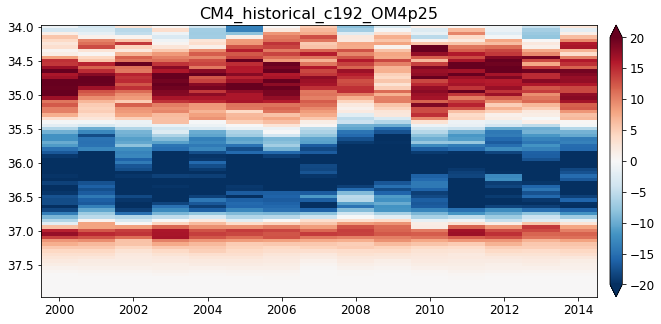

In [28]:
dsG_ann = dsG.groupby('time.year').mean('time')*1e-6
fig = hovmoeller(dsG_ann.swmt, fsize=[12, 5], cmap='RdBu_r', yincrease=False,vrange=[-20,20],title=subdir)

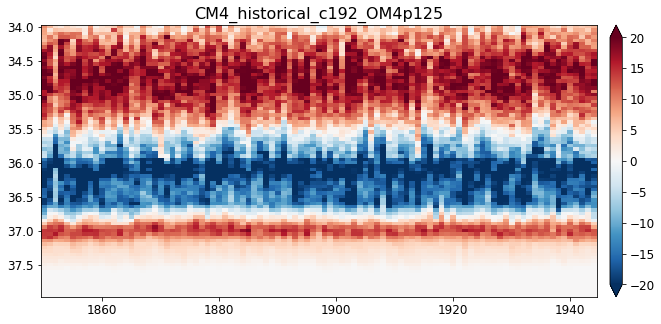

In [29]:
dsG = xr.open_dataset(outdir+fname)
dsG_ann = dsG.groupby('time.year').mean('time')*1e-6
dsG_anom = dsG_ann - dsG_ann.mean('year')

In [32]:
yr_st,yr_ed = '2005','2012'

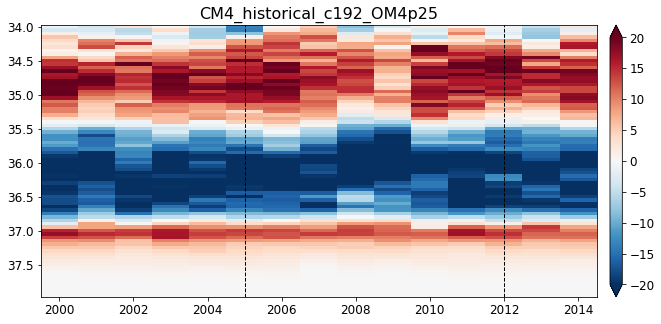

In [33]:
fig = hovmoeller(dsG_ann.swmt, fsize=[12, 5], cmap='RdBu_r', yincrease=False,vrange=[-20,20],
                 vline=[int(yr_st),int(yr_ed)],title=subdir)

In [34]:
import glob

In [35]:
dsGa = xr.open_dataset(glob.glob(outdir+'CM4_%s_251_so_*_southof300S_swmt_sigma2_005.nc'%subdir.split('_')[1])[0])
dsGb = xr.open_dataset(glob.glob(outdir+'ESM4_%s_D1_so_*_southof300S_swmt_sigma2_005.nc'%subdir.split('_')[1])[0])

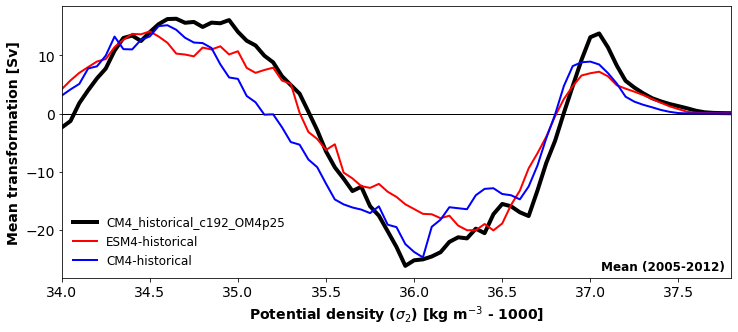

In [36]:
fig, ax = plt.subplots(figsize=(12,5))
ax.axhline(y=0, xmin=0, xmax=1, c = 'k', lw=1.0, ls='-')
ax.plot(dsG.coords[lstr], dsG.sel(time=slice(yr_st,yr_ed)).swmt.mean('time')*1e-6, 
        lw=4, c='k', ls='-',label=subdir)
ax.plot(dsGb.coords[lstr], dsGb.sel(time=slice(yr_st,yr_ed)).swmt.mean('time')*1e-6, 
        lw=2, c='r', ls='-',label='ESM4-%s'%subdir.split('_')[1])
ax.plot(dsGa.coords[lstr], dsGa.sel(time=slice(yr_st,yr_ed)).swmt.mean('time')*1e-6, 
        lw=2, c='b', ls='-',label='CM4-%s'%subdir.split('_')[1])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Potential density ($\sigma_%s$) [kg m$^{-3}$ - 1000]'%lstr[-1],fontsize=14,fontweight='bold')
ax.set_ylabel('Mean transformation [Sv]',fontsize=14,fontweight='bold')
ax.set_xlim([34,37.8])
ax.legend(frameon=False, fancybox=False, loc='lower left', ncol=1, fontsize=12)
ax.text(0.99, 0.02, 'Mean (%s-%s)'%(yr_st,yr_ed), ha='right', va='bottom', fontsize=12, fontweight='bold',transform=ax.transAxes)
plt.show()

In [37]:
#yr_st,yr_ed = '0251','0550'
G_mean = dsG.sel(time=slice(yr_st,yr_ed)).swmt.mean('time')
G_std = dsG.sel(time=slice(yr_st,yr_ed)).swmt.groupby('time.year').mean('time').std('year')

In [38]:
G_mean_sub = G_mean.sel(sigma2=slice(36,None))
sig_max = np.round(G_mean_sub[G_mean_sub.argmax()][lstr].values,2)
G_max = np.round(G_mean_sub[G_mean_sub.argmax()].values*1e-6,2)

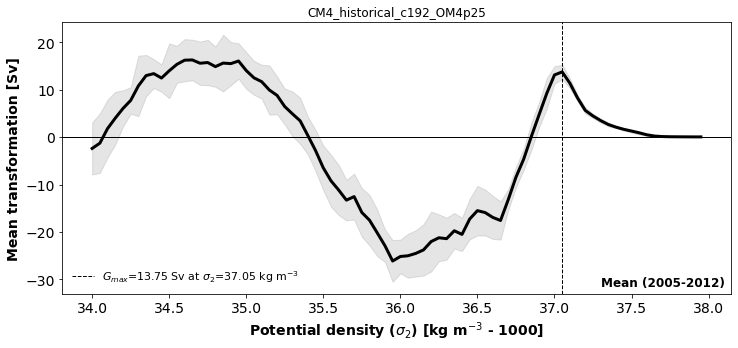

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
ax.axhline(y=0, xmin=0, xmax=1, c = 'k', lw=1.0, ls='-')
ax.fill_between(dsG.coords[lstr], (G_mean-G_std)*1e-6, (G_mean+G_std)*1e-6, alpha=0.1,
                edgecolor='k', facecolor='k')
ax.plot(dsG.coords[lstr], G_mean*1e-6, lw=3, c='k', ls='-')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Potential density ($\sigma_%s$) [kg m$^{-3}$ - 1000]'%lstr[-1],fontsize=14,fontweight='bold')
ax.set_ylabel('Mean transformation [Sv]',fontsize=14,fontweight='bold')
ax.axvline(x=sig_max, c = 'k', ls='--', lw=1, 
           label=r'$G_{max}$=%.2f Sv at $\sigma_%s$=%.2f kg m$^{-3}$'%(G_max,lstr[-1],sig_max))
ax.legend(loc='lower left', ncol=1, fontsize=11,frameon=False)
ax.set_title(subdir)
ax.text(0.99, 0.02, 'Mean (%s-%s)'%(yr_st,yr_ed), ha='right', va='bottom', fontsize=12, fontweight='bold',transform=ax.transAxes)
plt.show()

## Decompose WMT

In [40]:
G = dd.G(lstr, bins=lbins, group_tend=False)
G['total'] = G.heat+G.salt

In [41]:
with ProgressBar():
    G = G.load()

[########################################] | 100% Completed | 32.3s


In [42]:
var = 'swmt' # wmt, swmt
dl_str = str(dl).replace('.','').ljust(3, '0')
fname = subdir+'_so_%sto%s_southof%sS_%s_decomposed_%s_%s.nc'\
        %(str(G.time.dt.year[0].values).rjust(4, '0'), str(G.time.dt.year[-1].values).rjust(4, '0'),
          str(abs(north)).replace('.',''), var, lstr, str(dl).replace('.','').ljust(3, '0'))
print('Saving to file:', fname)

#with ProgressBar():
G.to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_so_2000to2014_southof300S_swmt_decomposed_sigma2_005.nc


In [43]:
G = xr.open_dataset(outdir+fname)
G_ann = G.groupby('time.year').mean('time')*1e-6
G_anom = G_ann - G_ann.mean('year')

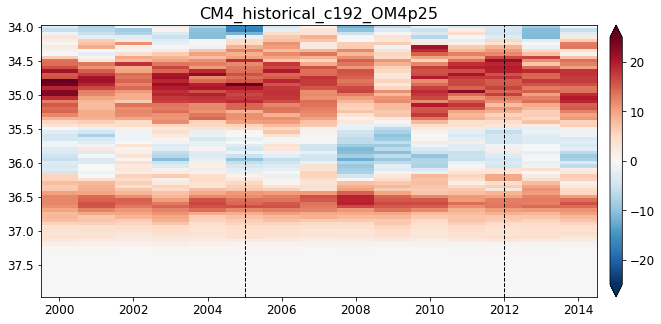

In [44]:
fig = hovmoeller(G_ann.heat, fsize=[12, 5], cmap='RdBu_r', yincrease=False, vrange=[-25,25],vline=[int(yr_st),int(yr_ed)],title=subdir)

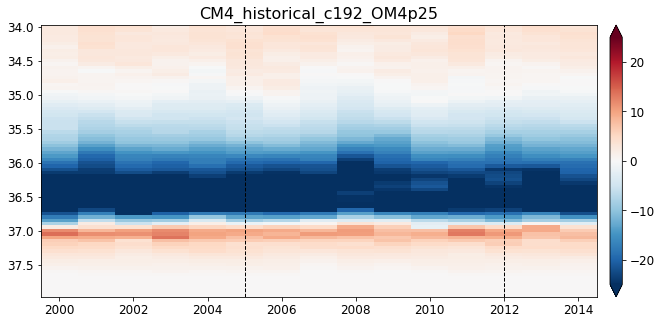

In [45]:
fig = hovmoeller(G_ann.salt, fsize=[12, 5], cmap='RdBu_r', yincrease=False, vrange=[-25,25],vline=[int(yr_st),int(yr_ed)],title=subdir)

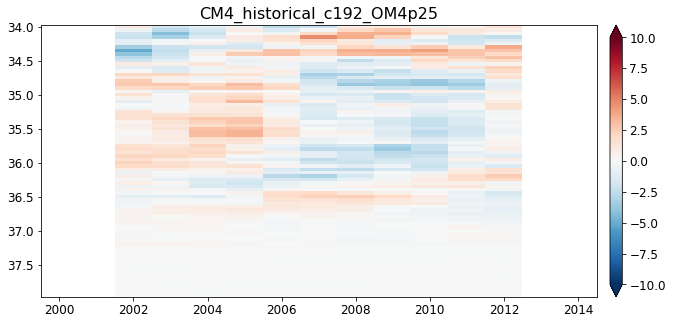

In [46]:
fig = hovmoeller(G_anom.heat.rolling(year=5,center=True).mean(), fsize=[12, 5], cmap='RdBu_r', yincrease=False, 
                 vrange=[-10,10],title=subdir)

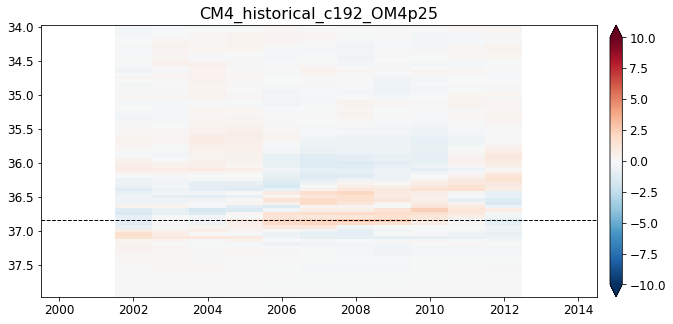

In [47]:
fig = hovmoeller(G_anom.salt.rolling(year=5,center=True).mean(), yincrease=False, fsize=[12, 5], cmap='RdBu_r', 
                 vrange=[-10,10],hline=[36.85],title=subdir)

In [48]:
G = xr.open_dataset(outdir+fname).sel(time=slice(yr_st,yr_ed))
G_mean = G.mean('time')
G_std = G.groupby('time.year').mean('time').std('year')

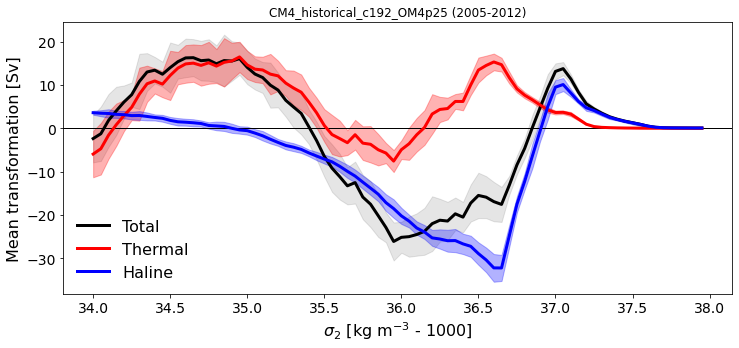

In [49]:
fig, ax = plt.subplots(figsize=(12,5))
ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.fill_between(G[lstr], (G_mean.total-G_std.total)*1e-6, (G_mean.total+G_std.total)*1e-6, 
                alpha=0.1, edgecolor='k', facecolor='k')
ax.plot(G[lstr], G_mean.total*1e-6, color='k', linestyle='-', lw=3, label='Total')#,marker='.')
ax.fill_between(G[lstr], (G_mean.heat-G_std.heat)*1e-6, (G_mean.heat+G_std.heat)*1e-6, 
                alpha=0.3, edgecolor='r', facecolor='r')
ax.plot(G[lstr], G_mean.heat*1e-6, color='r', linestyle='-', lw=3, label='Thermal')
ax.fill_between(G[lstr], (G_mean.salt-G_std.salt)*1e-6, (G_mean.salt+G_std.salt)*1e-6, 
                alpha=0.3, edgecolor='b', facecolor='b')
ax.plot(G[lstr], G_mean.salt*1e-6, color='b', linestyle='-', lw=3, label='Haline')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('$\sigma_%s$ [kg m$^{-3}$ - 1000]'%lstr[-1],fontsize=16)
ax.set_ylabel('Mean transformation [Sv]',fontsize=16)
ax.legend(frameon=False, fancybox=False, loc='lower left', ncol=1, fontsize=16)
ax.set_title('%s (%s-%s)'%(subdir,str(G.time.dt.year[0].values),str(G.time.dt.year[-1].values)), fontsize=12)
#ax.axvline(x=36.15, c = 'k', ls='--', lw=1)
plt.show()

## Spatial maps of transformation

In [50]:
val = 37.05
dl = 0.10
#yr_st,yr_ed = 'None','None'
yr_st,yr_ed = '2005','2012'

In [51]:
dsF = dd.isosurface_mean(lstr, val, dl = dl, ti=yr_st, tf=yr_ed,group_tend=False)
F_tot = dd.isosurface_mean(lstr, val, dl = dl, ti=yr_st, tf=yr_ed)

In [52]:
dsF['total'] = F_tot.reset_coords(drop=True)

dl_str = str(dl).replace('.','').ljust(3, '0')
fname = '%s_so_%sto%s_southof%sS_Fmap_%s_%s_at%s.nc'\
            %(subdir,yr_st,yr_ed,str(abs(north)).replace('.',''), lstr, dl_str,('%.2f'%val).replace('.',''))
print('Saving to file:', fname)
with ProgressBar():
    dsF.reset_coords(drop=True).to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_so_2005to2012_southof300S_Fmap_sigma2_010_at3705.nc
[########################################] | 100% Completed | 39.4s


In [53]:
# fname = 'CM4_abrupt4xCO2_so_0051to0150_southof300S_Fmap_sigma2_005_at3700.nc'
dsF = xr.open_dataset(outdir+fname)

In [54]:
from plot import cartopy_map_so

In [55]:
ds_so['transformation'] = dsF.total

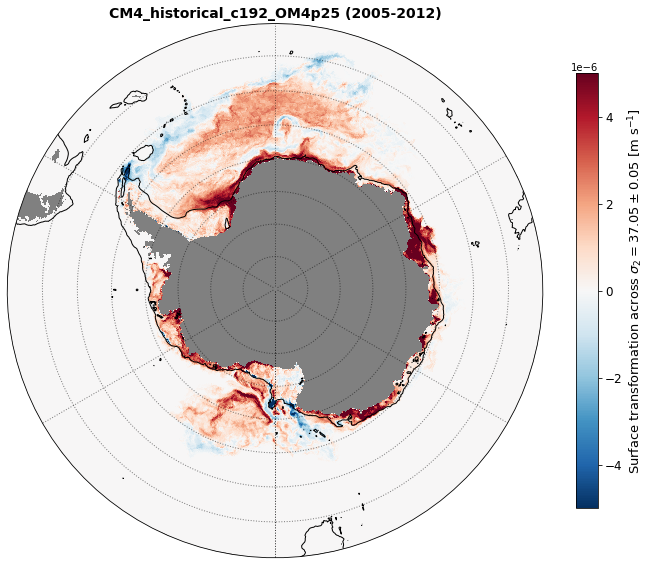

In [56]:
fig, ax = cartopy_map_so(ds_so,'transformation', lat=-50, fsize=[12,10], drawGrid=True,cmap='RdBu_r',vrange=[-5e-6,5e-6],
                         blevels=[1000.0],title=subdir+' (%s-%s)'%(yr_st,yr_ed),
                         cb_label='Surface transformation across $\sigma_%s=%.2f \pm %.2f$ [m s$^{-1}$]'%(lstr[-1],val,dl/2))

## Surface-forced streamfunction

In [18]:
#tstr = '%sto%s'%(str(ds.time.dt.year[0].values).rjust(4, '0'),str(ds.time.dt.year[-1].values).rjust(4, '0'))
tstr = '1850to2009'
print('Loading',subdir+'_global_'+tstr+'_moc_rho2_online_hires.nc')
moc_rho2 = xr.open_dataset(outdir+subdir+'_global_'+tstr+'_moc_rho2_online_hires.nc').psi

Loading CM4_historical_c192_OM4p25_global_1850to2009_moc_rho2_online_hires.nc


In [19]:
lats = moc_rho2.sel(yq=slice(None,moc_rho2.sel(yq=[north], method='nearest').squeeze().yq.values)).yq.values
#lats = np.arange(-70,-28,2)

In [23]:
Gs = []
for north in lats:
    print(north)
    ds_so = ds.drop_dims('nv').where(ds.lat<north,drop=True)
    ds_so['time_bnds'] = ds.time_bnds
    
    # Initialize 2D surface WMT class
    dd = swmt(ds_so)
    G = dd.G(lstr, bins=lbins)
    G['y'] = north
    Gs.append(G)

-80.34865656947974
-80.26749280962936
-80.18632905133127
-80.1051668964908
-80.02400790882328
-79.94285361531256
-79.86170550760079
-79.78056504331342
-79.69943364732279
-79.61831271295333
-79.53720360313179
-79.45610765148481
-79.37502616338729
-79.29396041696319
-79.21291166404204
-79.13188113107266
-79.05087001999685
-78.96987950908466
-78.88891075373323
-78.80796488723105
-78.72704302148952
-78.64614624774283
-78.56527563721848
-78.48443224177913
-78.40361709453762
-78.32283121044635
-78.24207558686206
-78.16135120408728
-78.08065902588964
-78.0
-77.89872315679153
-77.79744631358307
-77.6961694703746
-77.59489262716612
-77.49361578395765
-77.39233894074918
-77.29106209754072
-77.18978525433225
-77.08850841112378
-76.98723156791532
-76.88595472470685
-76.78467788149837
-76.6834010382899
-76.58212419508143
-76.48084735187297
-76.3795705086645
-76.27829366545603
-76.17701682224757
-76.0757399790391
-75.97446313583062
-75.87318629262215
-75.77190944941368
-75.67063260620522
-75.5693557

In [24]:
G_srf = xr.concat(Gs, dim='y').transpose('time','sigma2','y')

In [29]:
dsG = G_srf.reset_coords(drop=True).to_dataset(name='swmt')

In [65]:
var = 'swmt' # wmt, swmt
t_str = '%sto%s'%(str(ds.time.dt.year[0].values).rjust(4, '0'),str(ds.time.dt.year[-1].values).rjust(4, '0'))
north = -30.0
dl_str = str(dl).replace('.','').ljust(3, '0')

In [66]:
v = 'swmt'
fnames = subdir+'_so_%s_southof%sS_%s_streamfunction_%s_%s_%s_yr*.nc'%(t_str,str(abs(north)).replace('.',''), var, v, lstr, dl_str)
print(fnames)

CM4_historical_c192_OM4p25_so_2000to2014_southof300S_swmt_streamfunction_swmt_sigma2_005_yr*.nc


In [22]:
dsG = xr.open_mfdataset(outdir+fnames)

In [23]:
dsG

<xarray.Dataset>
Dimensions:  (time: 180, sigma2: 80, y: 378)
Coordinates:
  * time     (time) object 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
  * sigma2   (sigma2) float64 34.0 34.05 34.1 34.15 ... 37.8 37.85 37.9 37.95
  * y        (y) float64 -80.35 -80.27 -80.19 -80.11 ... -30.35 -30.13 -29.92
Data variables:
    swmt     (time, sigma2, y) float64 dask.array<chunksize=(12, 80, 378), meta=np.ndarray>

In [56]:
Gsrf = xr.open_dataset(outdir+'CM4_historical_c192_OM4p25_so_2000to2014_southof300S_swmt_sigma2_005.nc').swmt

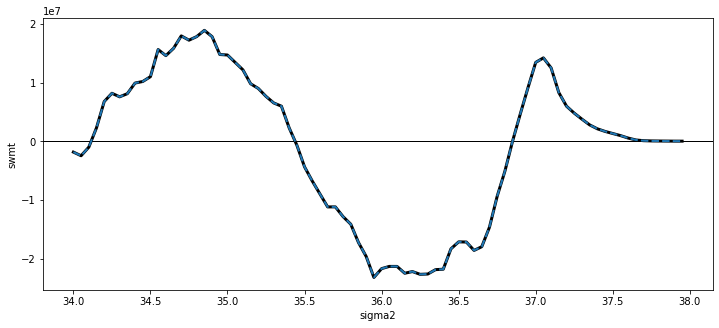

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
Gstmf.sel(time=slice('2001','2007')).mean('time').isel(y=-1).plot(ax=ax,color='k', linestyle='-', lw=3)
Gsrf.sel(time=slice('2001','2007')).mean('time').plot(ax=ax, linestyle='--', lw=2)

In [24]:
fname = subdir+'_so_%s_southof%sS_%s_streamfunction_%s_%s.nc'%(t_str,str(abs(north)).replace('.',''), var, lstr, dl_str)
print('Saving to file:', fname)
with ProgressBar():
    dsG.reset_coords(drop=True).to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_so_2000to2014_southof30S_swmt_streamfunction_sigma2_005.nc
[########################################] | 100% Completed |  0.7s


In [25]:
#yr_st,yr_ed = '1978','1987'
yr_st,yr_ed = str(ds.time.dt.year[0].values).rjust(4, '0'), str(ds.time.dt.year[-1].values).rjust(4, '0')
print(yr_st,yr_ed)

2000 2014


In [33]:
Gstmf = xr.open_dataset(outdir+fname).sel(time=slice(yr_st,yr_ed)).swmt

<xarray.DataArray 'swmt' (sigma2: 80, y: 378)>
array([[       0.        ,        0.        ,        0.        , ...,
        -1233122.95716385,  -768846.05388806,  -273092.60325052],
       [       0.        ,        0.        ,        0.        , ...,
        -2404318.61238503, -1818737.43154878, -1352182.27381175],
       [       0.        ,        0.        ,        0.        , ...,
        -1101328.08835201,  -595136.81676998,   -75274.5868533 ],
       ...,
       [       0.        ,        0.        ,        0.        , ...,
           56040.02224451,    56040.02224451,    56040.02224451],
       [       0.        ,        0.        ,        0.        , ...,
           44939.04721184,    44939.04721184,    44939.04721184],
       [       0.        ,        0.        ,        0.        , ...,
           46777.33087397,    46777.33087397,    46777.33087397]])
Coordinates:
  * sigma2   (sigma2) float64 34.0 34.05 34.1 34.15 ... 37.8 37.85 37.9 37.95
  * y        (y) float64 -80.35 -80.27 -80.19 -80.11 ... -30.35 -30.13 -29.92

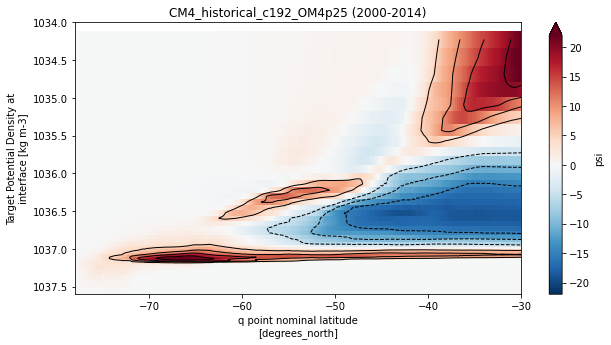

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
(-1*moc_rho2).sel(time=slice(yr_st,yr_ed)).mean('time').sel(rho2_i=slice(1034,1038),yq=slice(None,-29.9))\
    .plot(ax=ax, yincrease=False,cmap='RdBu_r',vmin=-22,vmax=22)
(-1*moc_rho2).sel(time=slice(yr_st,yr_ed)).mean('time').sel(rho2_i=slice(1034,1038),yq=slice(None,-29.9))\
    .plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)]), colors='k', linewidths=1)
ax.set_xlim((-78,-30))
ax.set_ylim((1037.6,1034))
ax.set_title(subdir+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

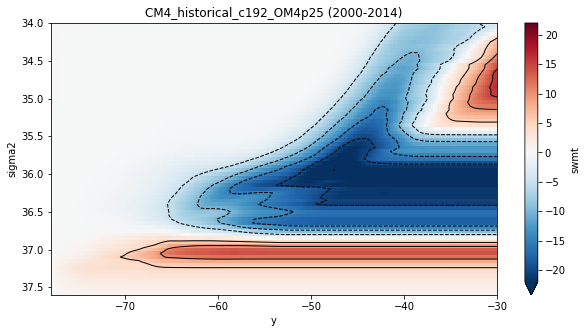

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
(Gstmf*1e-6).mean('time').plot(ax=ax, yincrease=False,cmap='RdBu_r',vmin=-22,vmax=22)
(Gstmf*1e-6).mean('time').plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)]), 
                                       colors='k', linewidths=1)
ax.set_xlim((-78,-30))
ax.set_ylim((37.6,34))
ax.set_title(subdir+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [36]:
smoc = moc_rho2.sel(rho2_i=slice(1033,1038),yq=slice(None,0))
smoc['sigma2'] = smoc.rho2_i-1000
smoc = smoc.swap_dims({'rho2_i':'sigma2'})

In [37]:
swmt = Gstmf.rename({'y':'yq'}).interp(sigma2=smoc.sigma2,kwargs={'fill_value':0}).mean('time')*1e-6

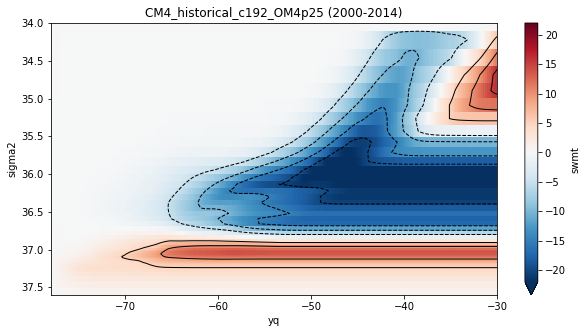

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
swmt.plot(ax=ax, yincrease=False,cmap='RdBu_r',vmin=-22,vmax=22)
swmt.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)]), colors='k', linewidths=1)
ax.set_xlim((-78,-30))
ax.set_ylim((37.6,34))
ax.set_title(subdir+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [96]:
dVdt_rho2 = xr.open_dataset(outdir+head+'_so_'+tstr+'_dVdt_streamfunction_rho2_online_lores.nc').dVdt

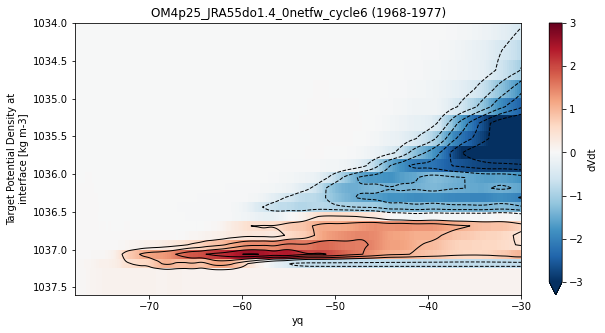

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
(dVdt_rho2).sel(time=slice(yr_st,yr_ed)).mean('time').sel(rho2_i=slice(1034,1038))\
    .plot(ax=ax, yincrease=False,cmap='RdBu_r',vmin=-3,vmax=3)
(dVdt_rho2).sel(time=slice(yr_st,yr_ed)).mean('time').sel(rho2_i=slice(1034,1038))\
    .plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-3,0,0.5),np.arange(0.5,3.5,0.5)]), colors='k', linewidths=1)
ax.set_xlim((-78,-30))
ax.set_ylim((1037.6,1034))
ax.set_title(head+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [79]:
G_30S = xr.open_dataset(outdir+head+'_so_'+tstr+'_southof300S_swmt_sigma2_005.nc').swmt

In [110]:
dVdt = dVdt_rho2.sel(rho2_i=slice(1033,1038),yq=slice(None,0))
dVdt['sigma2'] = dVdt.rho2_i-1000
dVdt = dVdt.swap_dims({'rho2_i':'sigma2'})

In [128]:
psi = smoc.sel(time=slice(yr_st,yr_ed)).mean('time').sel(yq=slice(None,moc_rho2.sel(yq=[north], method='nearest').squeeze().yq.values))

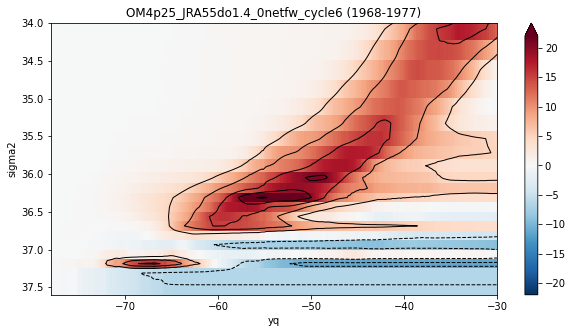

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
iwmt.plot(ax=ax, yincrease=False,cmap='RdBu_r',vmin=-22,vmax=22)
iwmt.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)]), colors='k', linewidths=1)
ax.set_xlim((-78,-30))
ax.set_ylim((37.6,34))
ax.set_title(head+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [132]:
iwmt=dVdt.sel(time=slice(yr_st,yr_ed)).mean('time')-psi-swmt

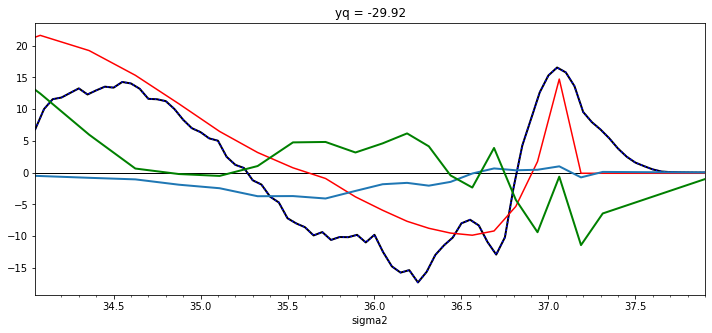

In [134]:
fig, ax = plt.subplots(figsize=(12,5))
ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
(Gstmf*1e-6).mean('time').sel(y=-30, method='nearest').squeeze().plot(ax=ax,c='k',lw=2)
(G_30S*1e-6).sel(time=slice(yr_st,yr_ed)).mean('time').plot(ax=ax,ls=':',c='b')
(-smoc).sel(yq=[-30], method='nearest').squeeze().sel(time=slice(yr_st,yr_ed)).mean('time').plot(ax=ax,c='r')
dVdt.sel(yq=[-30], method='nearest').squeeze().sel(time=slice(yr_st,yr_ed)).mean('time').plot(ax=ax,lw=2)
iwmt.sel(yq=[-30], method='nearest').squeeze().plot(ax=ax, color='g', linestyle='-', lw=2)
ax.set_xlim([34.05,37.8])
ax.set_xticks(np.arange(34.2,38,0.1), minor=True)
plt.show()

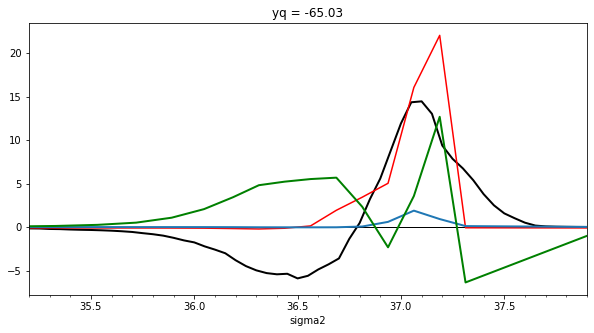

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
(Gstmf*1e-6).mean('time').sel(y=-65, method='nearest').squeeze().plot(ax=ax,c='k',lw=2)
(-smoc).sel(yq=[-65], method='nearest').squeeze().sel(time=slice(yr_st,yr_ed)).mean('time').plot(ax=ax,c='r')
dVdt.sel(yq=[-65], method='nearest').squeeze().sel(time=slice(yr_st,yr_ed)).mean('time').plot(ax=ax,lw=2)
iwmt.sel(yq=[-65], method='nearest').squeeze().plot(ax=ax, color='g', linestyle='-', lw=2)
ax.set_xlim([35.45,37.8])
ax.set_xticks(np.arange(35.2,38,0.1), minor=True)
plt.show()

In [140]:
#dsG = G_srf.reset_coords(drop=True).to_dataset(name='swmt')
dsG = Gstmf.reset_coords(drop=True).to_dataset(name='swmt')
north = -30
var = 'swmt' # wmt, swmt
dl_str = str(dl).replace('.','').ljust(3, '0')
fname = head+'_so_%sto%s_southof%sS_%s_streamfunction_%s_%s.nc'\
        %(str(Gstmf.time.dt.year[0].values).rjust(4, '0'),
          str(Gstmf.time.dt.year[-1].values).rjust(4, '0'),
          str(abs(north)).replace('.',''), var, lstr, dl_str)
print('Saving to file:', fname)
dsG.to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: OM4p25_JRA55do1.4_0netfw_cycle6_so_1968to1977_southof30S_swmt_streamfunction_sigma2_005.nc
